# Ray Surveyor results analysis

In [85]:
# Import modules 

from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

from surveyor_scripts.raysurveyor_gentree import read_matrix, build_tree
from surveyor_scripts.matrix_transform import drop_indices, normalize_gram_matrix

py.init_notebook_mode()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Generate a phenetic tree from the kmer gram matrix


In [86]:
# Read gram matrix as a pandas dataframe
sim_matrix_global = read_matrix('./survey.res/Surveyor/SimilarityMatrix.global.tsv')

# Removing filtering dataset entries from the gram matrix to keep only the genome entries
sim_matrix_global = drop_indices(sim_matrix_global, [0,1,2,3])
display(sim_matrix_global)

,AF069671.1,AF224507.1,AY445524.1,EU541617.1,GQ372986.1
AF069671.1,8845,1202,1415,1565,2142
AF224507.1,1202,9129,2155,4006,1276
AY445524.1,1415,2155,9112,2395,1349
EU541617.1,1565,4006,2395,9070,1456
GQ372986.1,2142,1276,1349,1456,8958


In [87]:
# Heatmap of the gram matrix
trace = go.Heatmap(z=normalize_gram_matrix(sim_matrix_global.as_matrix()),
                   x=sim_matrix_global.axes[0], 
                   y=sim_matrix_global.axes[1])
layout = go.Layout(
    title='Whole genomes gram matrix',
    xaxis = dict(ticks='', nticks=22),
    yaxis = dict(ticks='' )
)
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

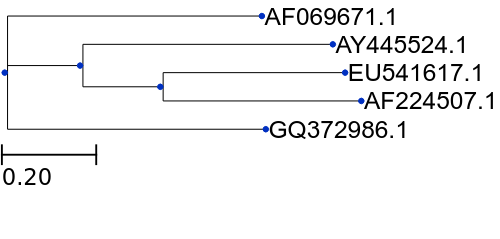

In [90]:
from scipy.spatial.distance import pdist, squareform
import pandas as pd

# Get the strain's name
names_list = [str(i) for i in sim_matrix_global.index.values.tolist()]

# Get the normalized matrix
norm_mat = normalize_gram_matrix(sim_matrix_global.as_matrix())

# Generate a distance matrix from normalized matrix with a distance function (euclidean)
dist_mat = squareform(pdist(norm_mat, 'euclidean'))
df_dist = pd.DataFrame(dist_mat, index=sim_matrix_global.index, columns=sim_matrix_global.columns)

# Build an ete3 Tree (neighbor joining)
tree = build_tree(df_dist, names_list, 'nj')
tree.render("%%inline", w=500)